In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading data

In [2]:
data = pd.read_csv('classification_train.csv')

In [3]:
#importing dataset
data = pd.read_csv('classification_train.csv')
x = data.iloc[:20000,2:786].values

y = data.iloc[:20000,1].values
y = y.reshape(y.shape[0],1)

In [4]:
m, n = x.shape
x.shape,y.shape 

((20000, 784), (20000, 1))

In [5]:
mu     = np.mean(x,axis=0)   
sigma  = np.std(x,axis=0) 
x_mean = (x - mu)
x_norm = (x - mu)/sigma
X=x_norm.T
X.shape

(784, 20000)

In [6]:
""" Y: onehot encoded """
unique_values=(np.unique(y))
Y=np.zeros((m,len(unique_values)))
for i in range(m):
    for j in range(len(unique_values)):
        if y[i][0]==unique_values[j]: Y[i][unique_values[j]]=1 

y=Y.T
y.shape,y
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

# Activation functions 

In [7]:
def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)

In [8]:
def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)


# Initialize Parameters

In [9]:
def initialize_parameters(n, n_1, n_2):
   
    w1 = np.random.randn(n_1, n)*0.01
    b1 = np.zeros((n_1, 1))
    
    
    w2 = np.random.randn(n_2, n_1)*0.01
    b2 = np.zeros((n_2, 1))
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
  
    
    return parameters

# Forward propagation

In [10]:
def forward_propagation(x, parameters):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    

    z1 = np.dot(w1, x) + b1
    a1 = relu(z1)
    
    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)
    
    forward_prop = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2
    }
    
    return forward_prop

# Cost Function

In [11]:
def cost_function(a2, y):
    
    cost = -(1/m)*np.sum(y*np.log(a2))
    
    
    return cost

# Backpropagation

In [12]:
def backward_prop(x, y, parameters, forward_prop):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    a1 = forward_prop['a1']
    a2 = forward_prop['a2']
    z1 = forward_prop['z1']
    
    dz2 = (a2 - y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)
    
    dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_relu(z1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)
    
    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }
    
    return gradients

# Gradient descent

In [13]:
def model(x, y, n_1, learning_rate, iterations):
    
    
    cost_list = []
    
    parameters = initialize_parameters(n, n_1, n_2)
    
    for i in range(iterations):
        
        forward_prop = forward_propagation(x, parameters)
        
        cost = cost_function(forward_prop['a2'], y)
        
        gradients = backward_prop(x, y, parameters, forward_prop)
    
        
        w1 = parameters['w1']
        b1 = parameters['b1']
        w2 = parameters['w2']
        b2 = parameters['b2']
    
        dw1 = gradients['dw1']
        db1 = gradients['db1']
        dw2 = gradients['dw2']
        db2 = gradients['db2']
    
        w1 = w1 - learning_rate*dw1
        b1 = b1 - learning_rate*db1
        w2 = w2 - learning_rate*dw2
        b2 = b2 - learning_rate*db2
    
        parameters = {
                       "w1" : w1,
                       "b1" : b1,
                       "w2" : w2,
                       "b2" : b2
                           }
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("Cost after", i, "iterations is :", cost)
        
    return parameters, cost_list

In [15]:
iterations = 1000
n_1 = 1000
n_2 =10
learning_rate = 0.04
Parameters, Cost_list = model(X, y, n_1, learning_rate = learning_rate, iterations = iterations)

Cost after 0 iterations is : 2.2993029403782925
Cost after 100 iterations is : 1.1632100561162313
Cost after 200 iterations is : 0.9375657373969889
Cost after 300 iterations is : 0.8371888017208053
Cost after 400 iterations is : 0.7774949654027181
Cost after 500 iterations is : 0.736548339707958
Cost after 600 iterations is : 0.7060031108420455
Cost after 700 iterations is : 0.6819397705219984
Cost after 800 iterations is : 0.6622495778054015
Cost after 900 iterations is : 0.6456844272131924


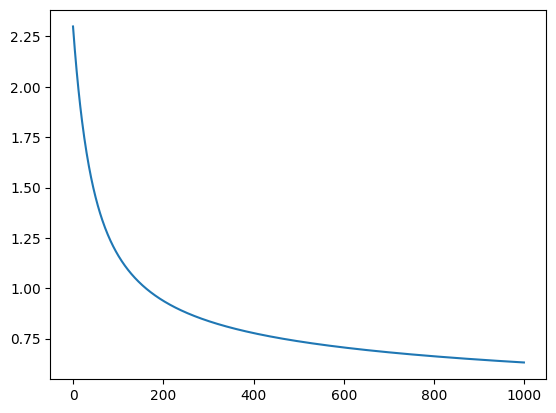

In [16]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.show()

In [18]:
w1 = Parameters['w1']
b1 = Parameters['b1']
w2 = Parameters['w2']
b2 = Parameters['b2']

# Accuracy on test data

In [19]:
x_test = data.iloc[20000:,2:786].values
m_test,n_test=x_test.shape
y_test=data.iloc[20000:,1].values
y_test = y_test.reshape(y_test.shape[0],1)
y_test.shape

(10000, 1)

In [20]:
mu     = np.mean(x_test,axis=0)   
sigma  = np.std(x,axis=0) 
x_mean = (x_test - mu)
x_norm_test = (x_test - mu)/sigma
x_test=x_norm_test.T

In [21]:
z1_test = np.dot(w1, x_test) + b1
a1_test = relu(z1_test)
    
z2_test = np.dot(w2, a1_test) + b2
# a2_test = softmax(z2_test)

In [22]:
pred_test=np.argmax(z2_test, axis=0)
pred_test = pred_test.reshape(pred_test.shape[0],1)
pred_test.shape

(10000, 1)

In [23]:
count=0
for i in range(m_test):
    
    if y_test[i,0] ==pred_test[i,0]:
        count+=1 
print(count)

7946


In [24]:
accuracy=(count/m_test)*100
print('Accuracy on test data = '+str(accuracy)+'%')

Accuracy on test data = 79.46%
